In [ ]:
!nvidia-smi

Sat Mar 16 05:33:43 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.9/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="WZ6CzSm7xPcc2BDIMun3")
project = rf.workspace("brindha").project("computer_vision-tz1x3")
version = project.version(6)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to computer_vision-6 in yolov8:: 100%|██████████| 72/72 [00:00<00:00, 6269.77it/s]


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

[Errno 2] No such file or directory: '{HOME}'
/content
100% 21.5M/21.5M [00:00<00:00, 250MB/s]
New https://pypi.org/project/ultralytics/8.1.29 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/computer_vision-6/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True

In [ ]:
!ls /content/computer_vision-6/test/images

IMG_1116_jpg.rf.bf46822444e8fd03834f121c97ae2121.jpg
IMG_1235_jpg.rf.0641dab1ab7bc216c5fda8de9975ae33.jpg


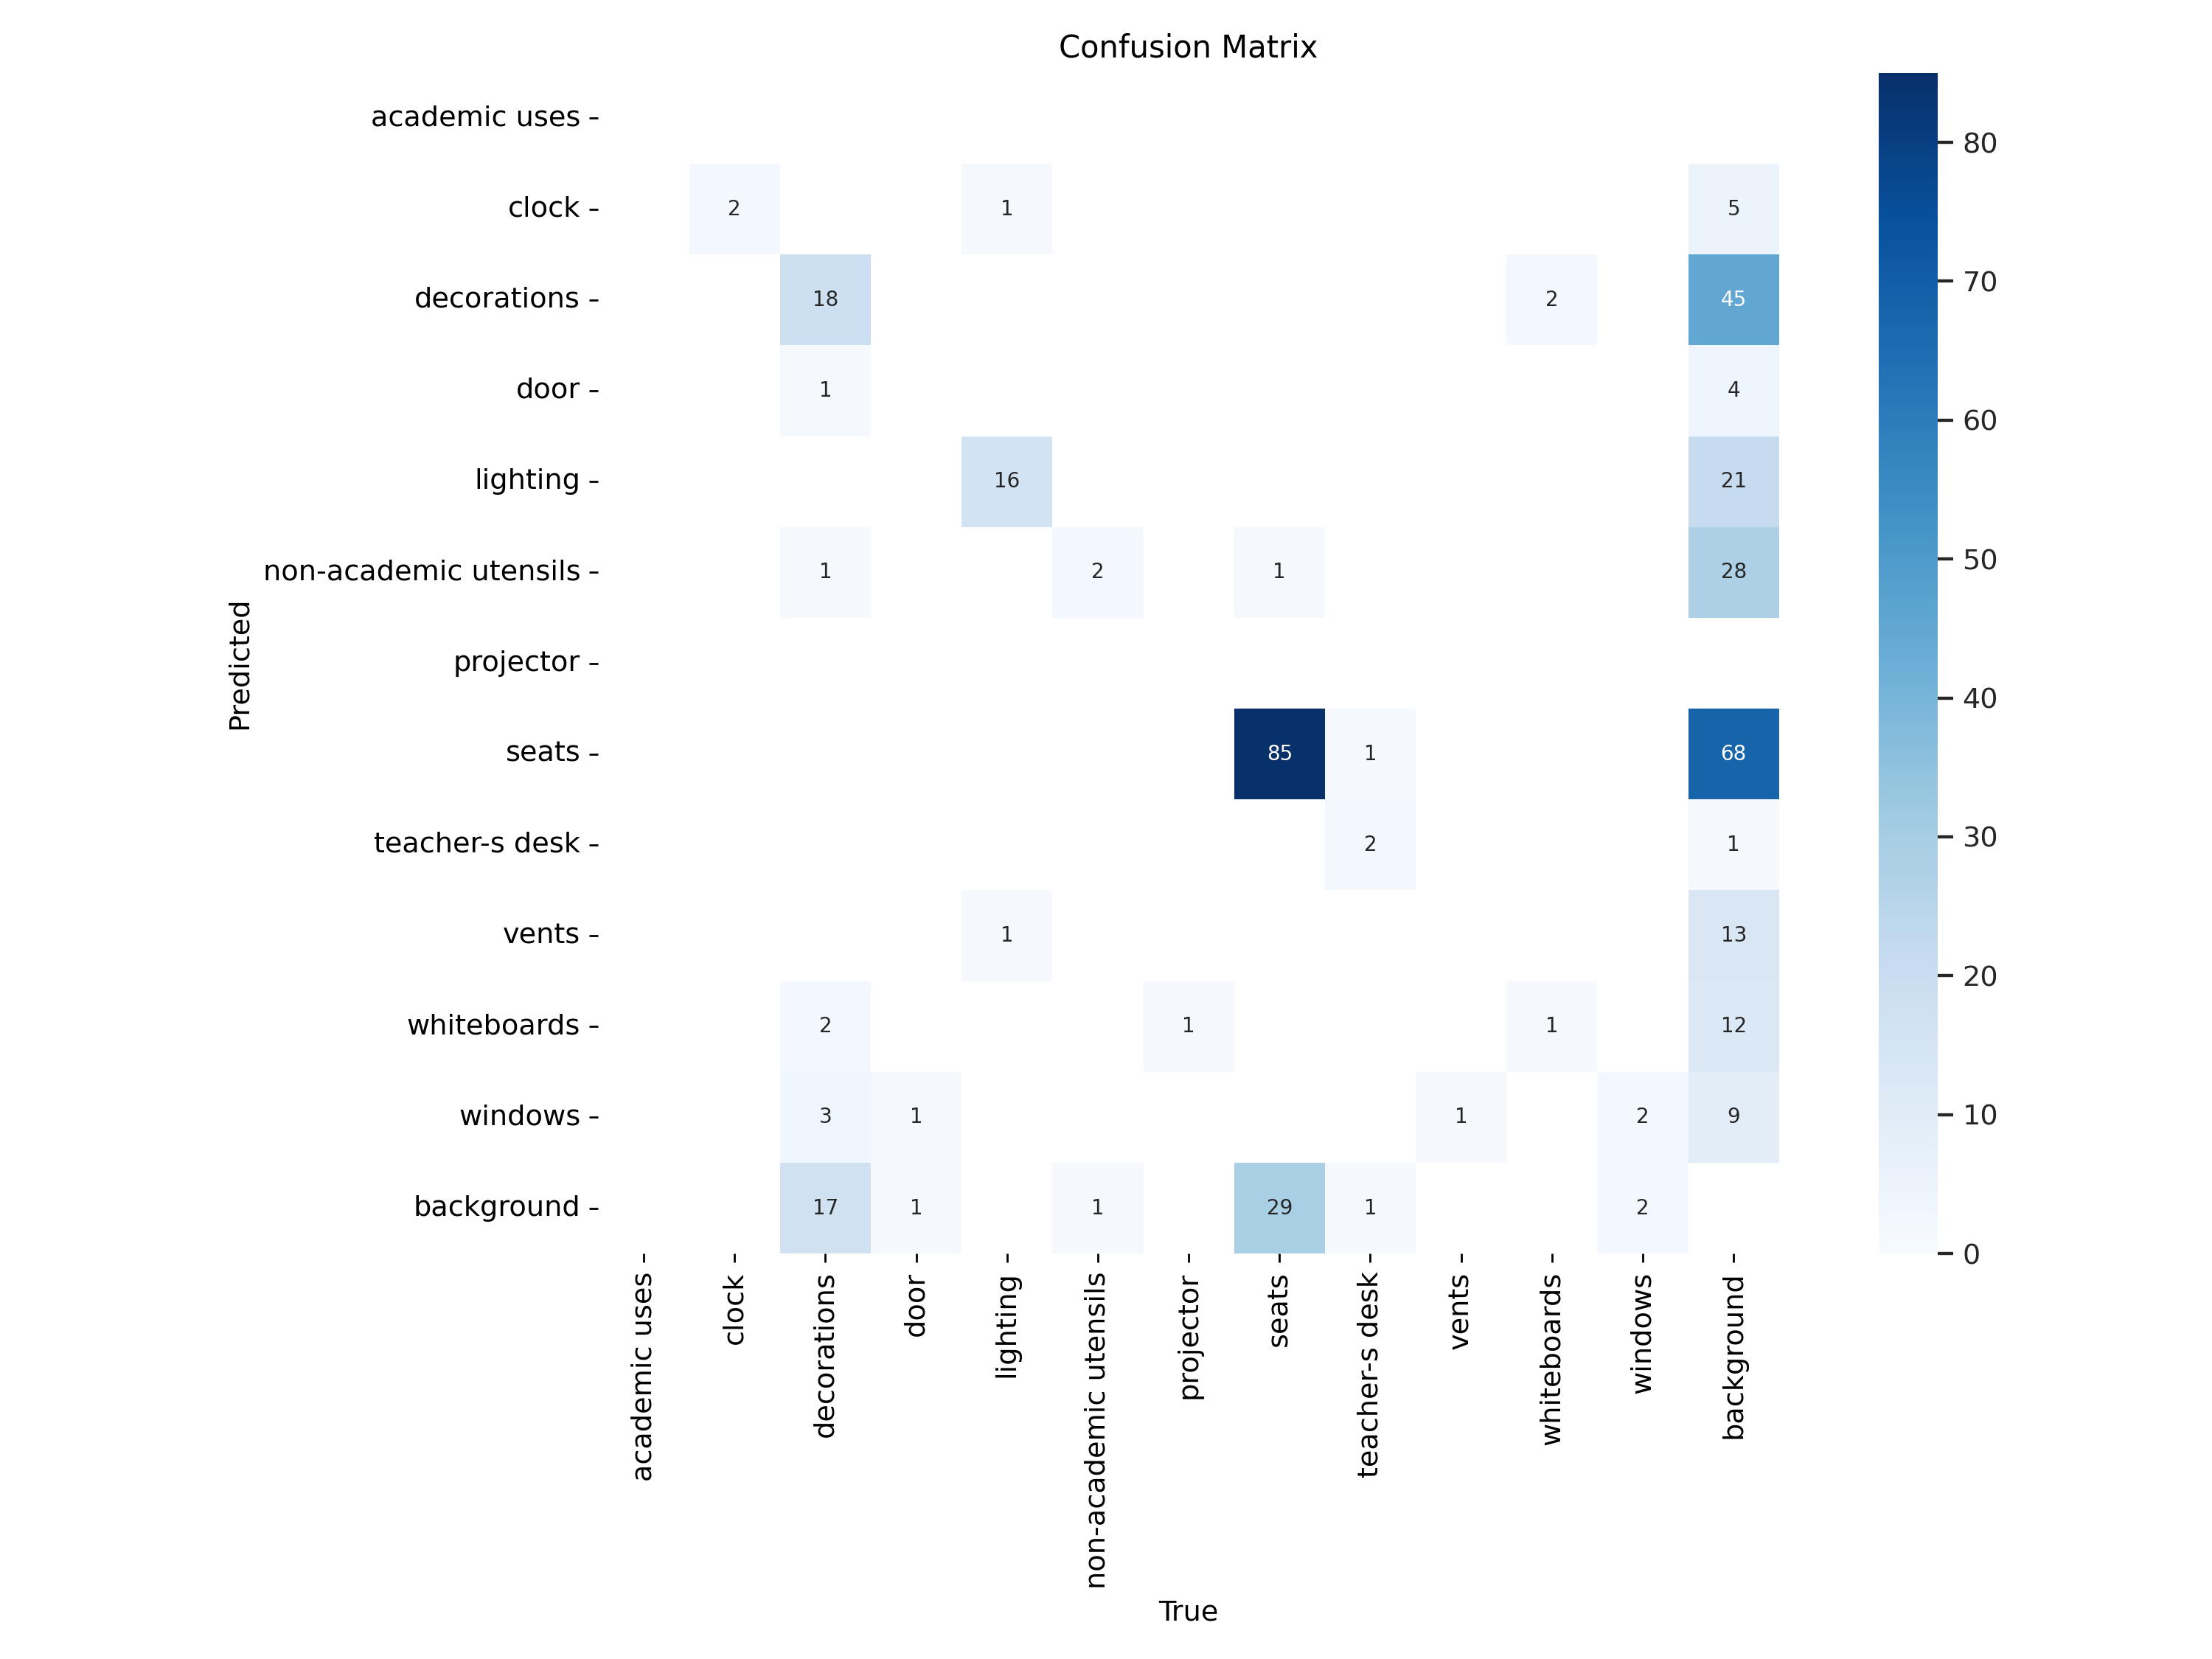

In [ ]:
from IPython.display import Image

# Display the image
Image(filename='/content/runs/detect/train/confusion_matrix.png', width=600)

In [ ]:
'''
import os

home_dir = os.path.expanduser("~")
print(home_dir)
'''

/root


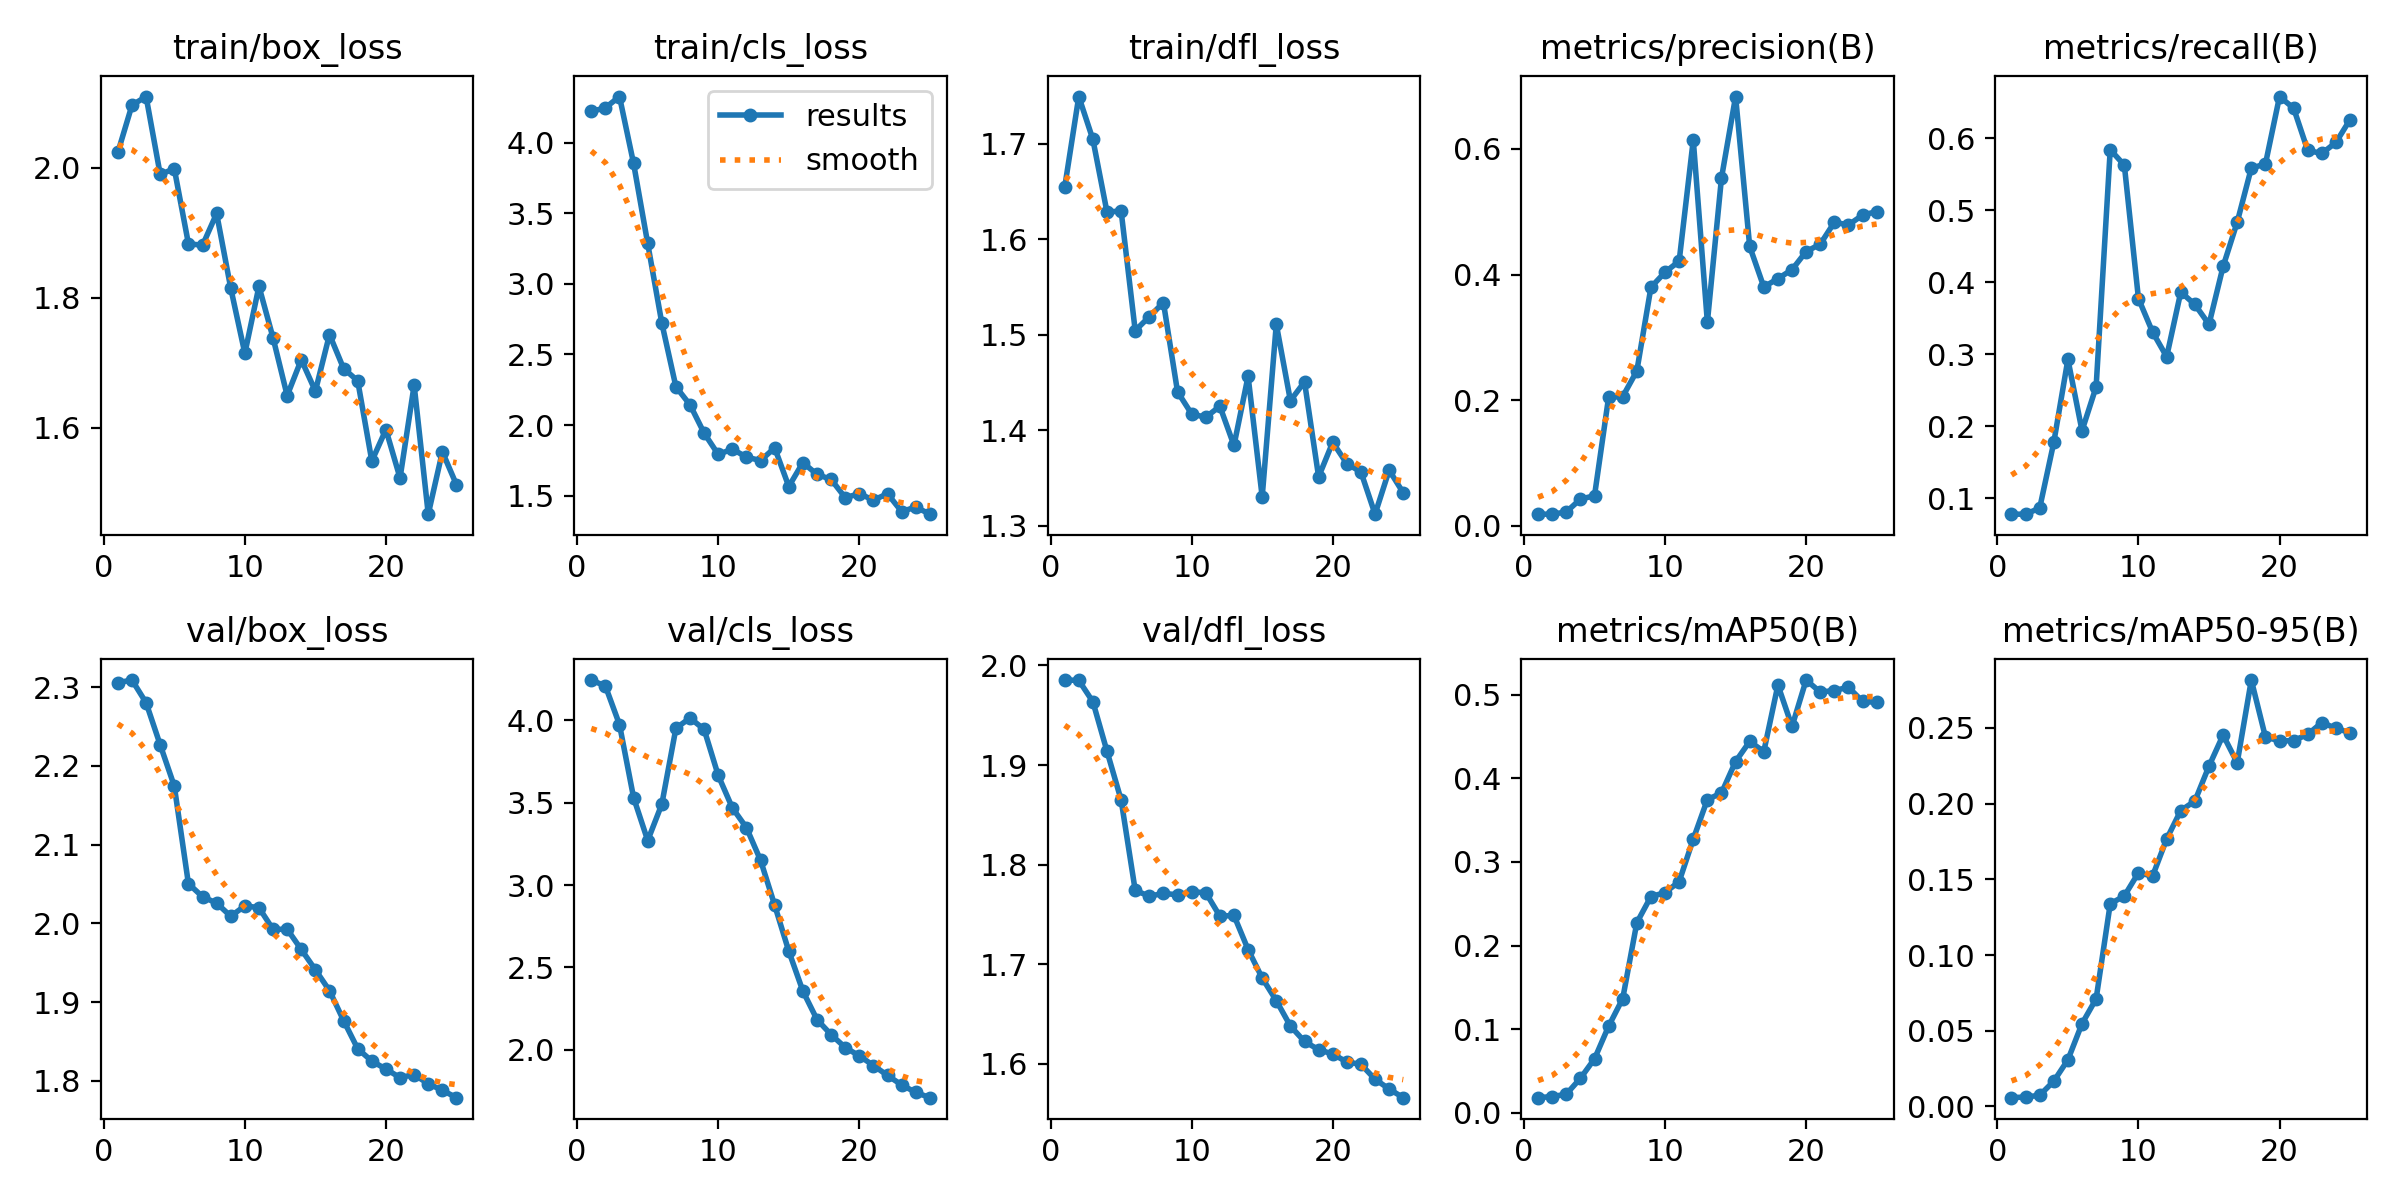

In [ ]:
from IPython.display import Image

Image(filename=f'/content/runs/detect/train/results.png', width=600)

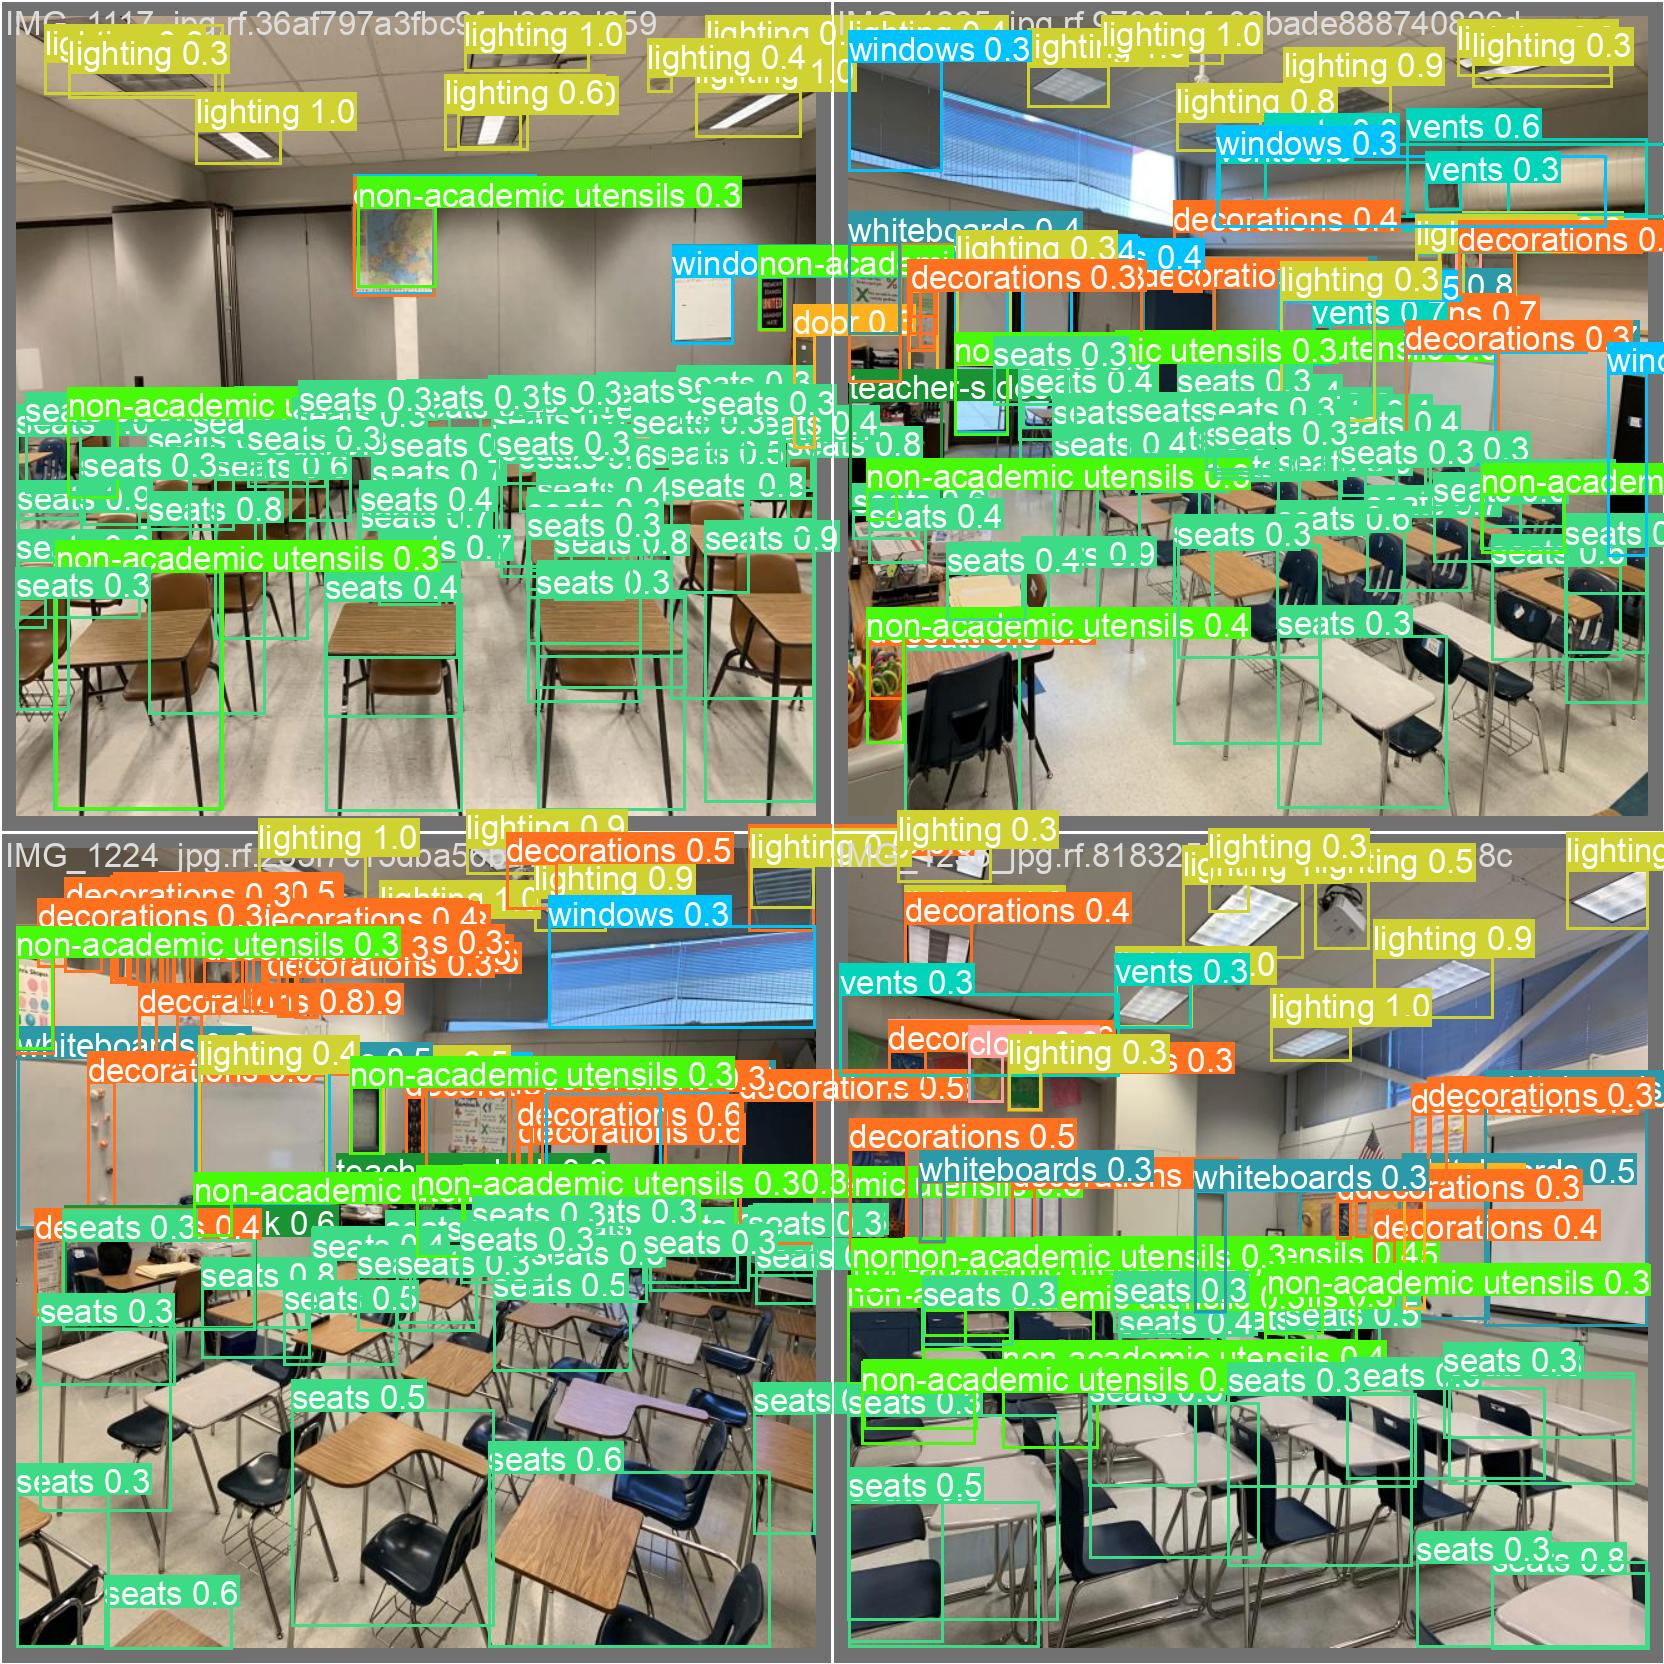

In [ ]:
#%cd {HOME}
Image(filename=f'/content/runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11130228 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/computer_vision-6/valid/labels.cache... 4 images, 0 backgrounds, 0 corrupt: 100% 4/4 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0% 0/1 [00:00<?, ?it/s]WARNING ⚠️ NMS time limit 0.700s exceeded
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  1.01it/s]
                   all          4        195      0.381      0.477      0.443      0.227
                 clock          4          2      0.421          1      0.995      0.653
           decorations          4         42       0.35      0.357      0.335      0.181
                  door          4          2      0.425        0.5      0.262      0.105
              lighting          4         18      0.448      0.556   

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11130228 parameters, 0 gradients, 28.5 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/2 /content/computer_vision-6/test/images/IMG_1116_jpg.rf.bf46822444e8fd03834f121c97ae2121.jpg: 800x800 11 decorationss, 6 doors, 15 lightings, 4 non-academic utensilss, 48 seatss, 1 teacher-s desk, 5 whiteboardss, 4 windowss, 22.5ms
image 2/2 /content/computer_vision-6/test/images/IMG_1235_jpg.rf.0641dab1ab7bc216c5fda8de9975ae33.jpg: 800x800 16 decorationss, 5 lightings, 5 non-academic utensilss, 24 seatss, 3 teacher-s desks, 2 whiteboardss, 4 windowss, 22.6ms
Speed: 7.4ms preprocess, 22.6ms inference, 414.2ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


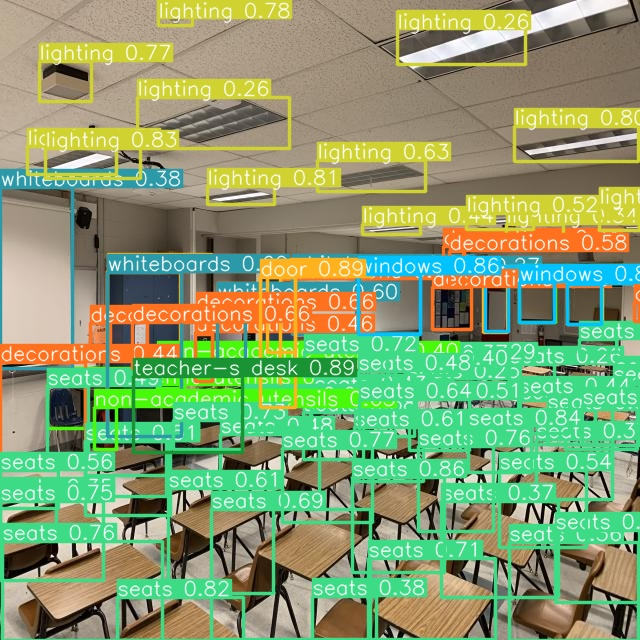

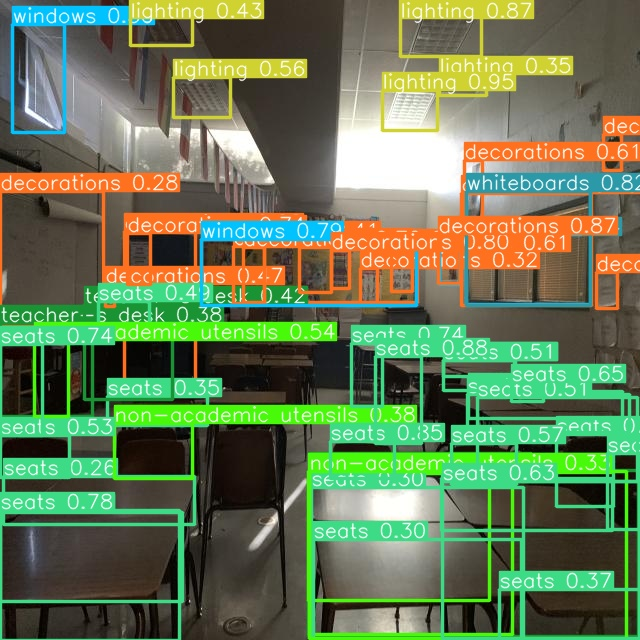

In [ ]:
# Let's take a look at few results
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
#Deploy model on Roboflow
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"/content/runs/detect/train/")

View the status of your deployment at: https://app.roboflow.com/brindha/computer_vision-tz1x3/6
Share your model with the world at: https://universe.roboflow.com/brindha/computer_vision-tz1x3/model/6


In [ ]:
#Run inference on your model on a persistant, auto-scaling, cloud API

#load model
model = project.version(dataset.version).model

#choose random test set image
import os, random
print(os.curdir)
test_set_loc = "/content/computer_vision-6/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

.
running inference on IMG_1235_jpg.rf.0641dab1ab7bc216c5fda8de9975ae33.jpg


{'predictions': [{'x': 409.0,
   'y': 109.5,
   'width': 50.0,
   'height': 39.0,
   'confidence': 0.9578818082809448,
   'class': 'lighting',
   'class_id': 4,
   'detection_id': '5bd3ff1c-6cec-4e5f-a694-41072e20812f',
   'image_path': '/content/computer_vision-6/test/images/IMG_1235_jpg.rf.0641dab1ab7bc216c5fda8de9975ae33.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 362.5,
   'y': 460.0,
   'width': 65.0,
   'height': 38.0,
   'confidence': 0.9079132676124573,
   'class': 'seats',
   'class_id': 7,
   'detection_id': 'df8f071b-55df-4adc-a711-2bc8a3fb957c',
   'image_path': '/content/computer_vision-6/test/images/IMG_1235_jpg.rf.0641dab1ab7bc216c5fda8de9975ae33.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 98.0,
   'y': 559.0,
   'width': 196.0,
   'height': 162.0,
   'confidence': 0.9010080099105835,
   'class': 'seats',
   'class_id': 7,
   'detection_id': '43f198f1-c9a0-480e-956c-3361b9267392',
   'image_path': '/content/computer_vision-6/test/images/